# Analysis of India's crime_rate dataset using K-Means Clustering

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random,float,array
import numpy as np
import seaborn as sns
import dask.dataframe as dd 

In [5]:
df=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
df1 = dd.read_csv('dataset-1/10_Property_stolen_and_recovered.csv')
df2 = dd.read_csv('dataset-1/39_Specific_purpose_of_kidnapping_and_abduction.csv')
df3 = dd.read_csv('dataset-1/32_Murder_victim_age_sex.csv')
df4 = dd.read_csv('dataset-1/crime/23_Anti_corruprion_cases.csv')
df5 = dd.read_csv('dataset-1/20_Victims_of_rape.csv')

In [6]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [7]:
df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

df1.head()

df2.head()

df3.head()

df4.head()

df5.head()

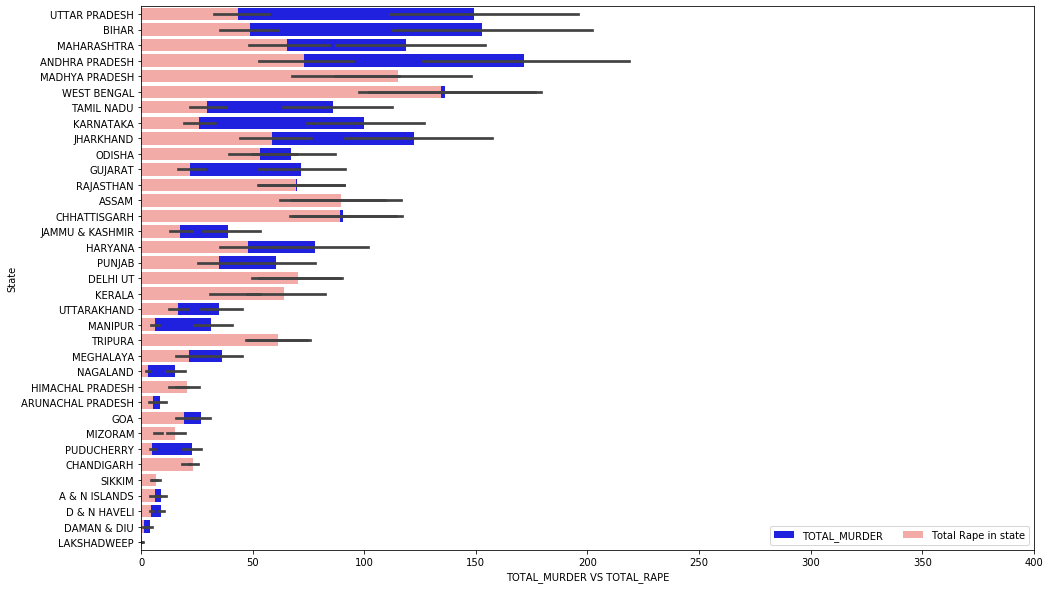

In [8]:
f, ax =plt.subplots(figsize=(16,10))

stats=df.sort_values("MURDER", ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x="MURDER",y="STATE/UT",data=stats,label="TOTAL_MURDER",color="blue")

sns.barplot(x="RAPE", y="STATE/UT", data=stats,
            label="Total Rape in state", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="TOTAL_MURDER VS TOTAL_RAPE");

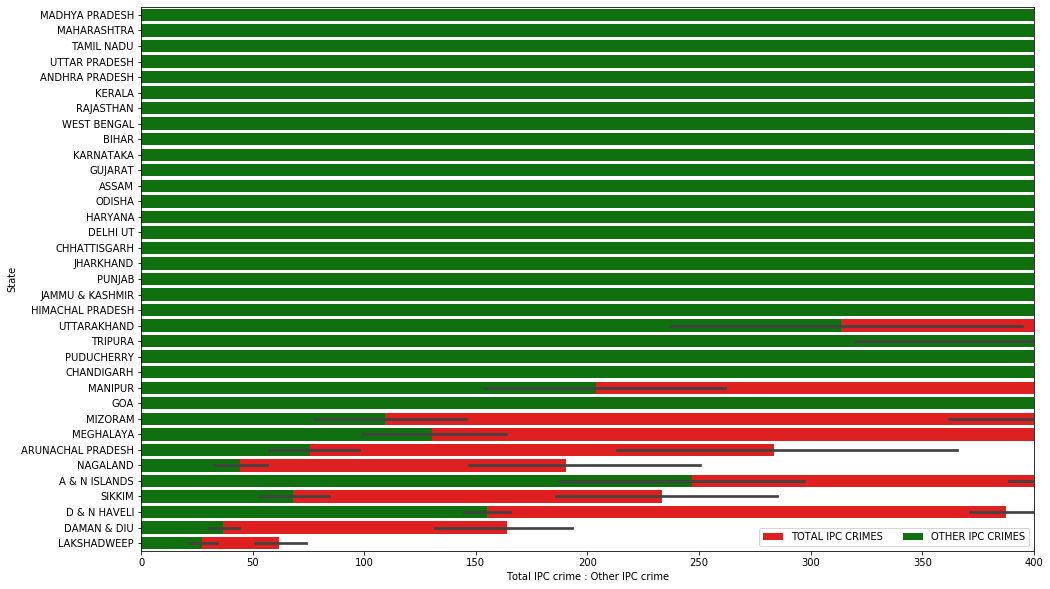

In [9]:
f, ax =plt.subplots(figsize=(16,10))

stats=df.sort_values("TOTAL IPC CRIMES", ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x="TOTAL IPC CRIMES",y="STATE/UT",data=stats,label="TOTAL IPC CRIMES",color="red")

sns.barplot(x="OTHER IPC CRIMES", y="STATE/UT", data=stats,
            label="OTHER IPC CRIMES", color="green")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total IPC crime : Other IPC crime");

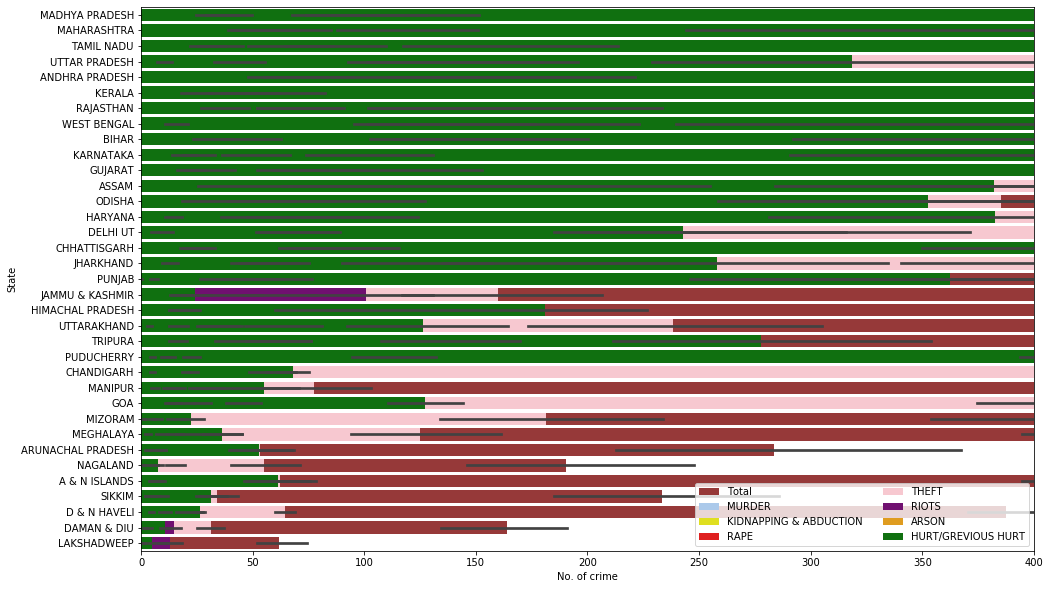

In [10]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("TOTAL IPC CRIMES", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="TOTAL IPC CRIMES", y="STATE/UT", data=stats,
            label="Total", color="brown")

sns.barplot(x="MURDER", y="STATE/UT", data=stats,
            label="MURDER", color="b")

sns.barplot(x="KIDNAPPING & ABDUCTION", y="STATE/UT", data=stats,
            label="KIDNAPPING & ABDUCTION", color="yellow")

sns.barplot(x="RAPE", y="STATE/UT", data=stats,
            label="RAPE", color="red")

sns.barplot(x="THEFT", y="STATE/UT", data=stats,
            label="THEFT", color="pink")

sns.barplot(x="RIOTS", y="STATE/UT", data=stats,
            label="RIOTS", color="purple")

sns.barplot(x="ARSON", y="STATE/UT", data=stats,
            label="ARSON", color="orange")

sns.barplot(x="HURT/GREVIOUS HURT", y="STATE/UT", data=stats,
            label="HURT/GREVIOUS HURT", color="green")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="No. of crime");

In [11]:
X = df[['MURDER','KIDNAPPING & ABDUCTION','RAPE','THEFT','RIOTS','ARSON','HURT/GREVIOUS HURT','TOTAL IPC CRIMES']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,72136.000000
1,2,24445.399017
2,3,18505.430798
3,4,15273.790710
4,5,12916.750311
5,6,11620.671591
6,7,10620.280088
7,8,9587.043688
8,9,8573.818699
9,10,7864.119263


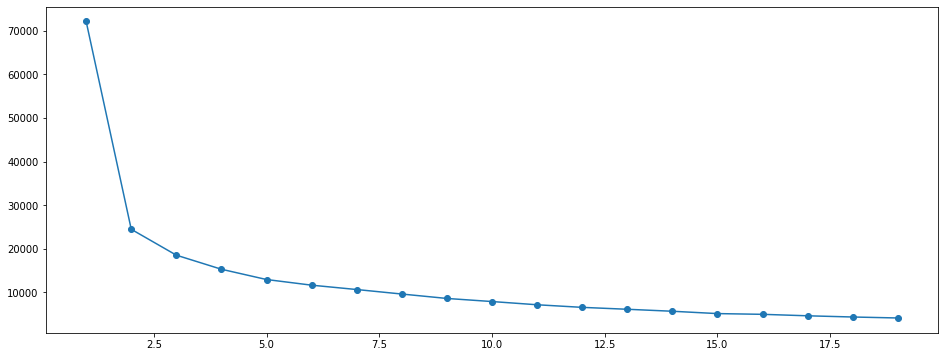

In [12]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [13]:
X = df[['MURDER','KIDNAPPING & ABDUCTION','RAPE','THEFT','RIOTS','ARSON','HURT/GREVIOUS HURT','TOTAL IPC CRIMES']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,MURDER,KIDNAPPING & ABDUCTION,RAPE,THEFT,RIOTS,ARSON,HURT/GREVIOUS HURT,TOTAL IPC CRIMES
0,101,46,50,199,78,30,1131,4154
1,151,53,23,366,168,69,1543,4125
2,101,59,27,723,156,38,2088,5818
3,80,25,20,173,164,23,795,3140
4,82,49,23,1021,70,41,1244,6507


sns.lmplot('MURDER' ,'KIDNAPPING & ABDUCTION', data=df,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


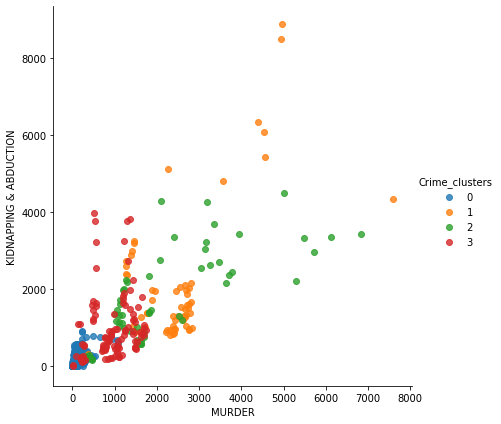

In [14]:
sns.lmplot( 'MURDER','KIDNAPPING & ABDUCTION',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

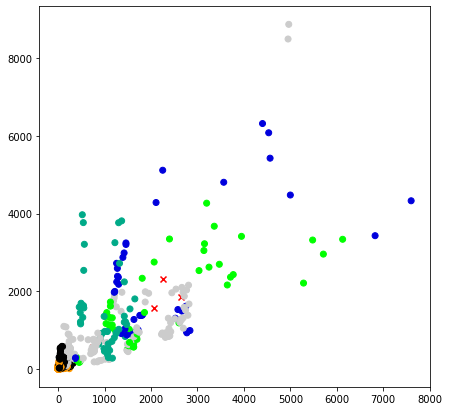

In [15]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='RED')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]); 
#print(data)
#print(centers)

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


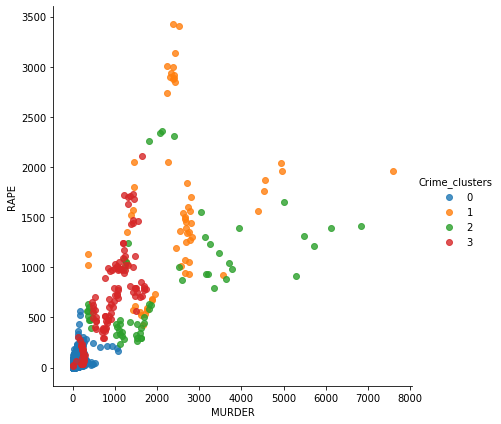

In [16]:
sns.lmplot( 'MURDER','RAPE',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

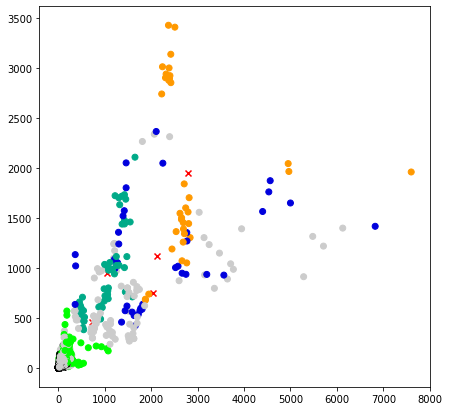

In [17]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


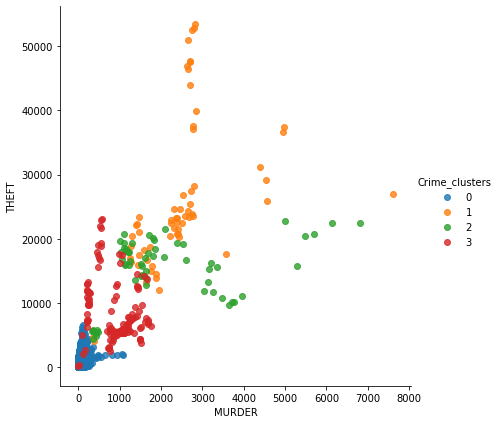

In [18]:
sns.lmplot( 'MURDER','THEFT',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

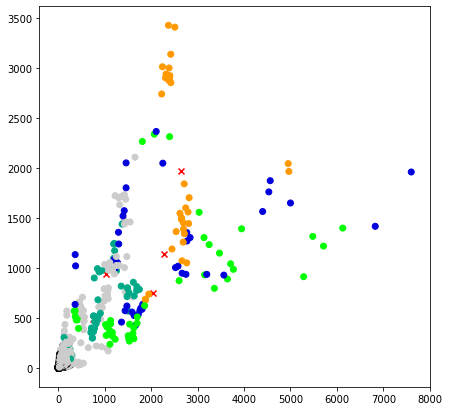

In [19]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


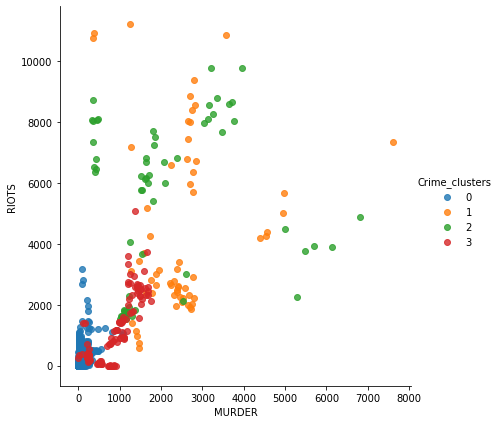

In [20]:
sns.lmplot( 'MURDER','RIOTS',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

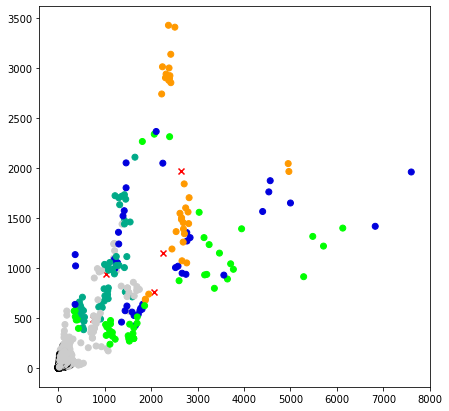

In [21]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


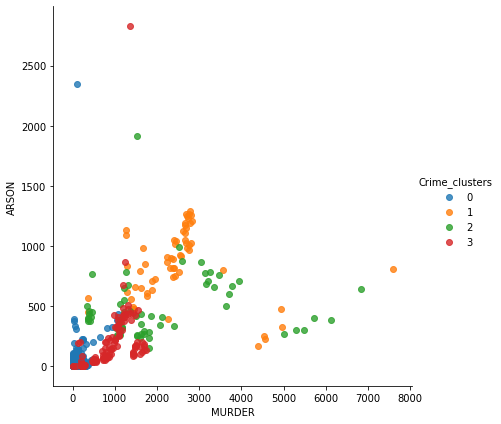

In [22]:
sns.lmplot( 'MURDER','ARSON',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

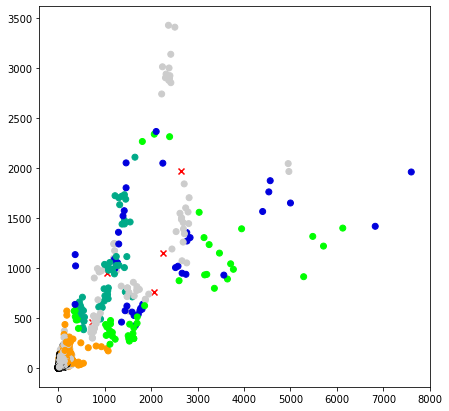

In [23]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


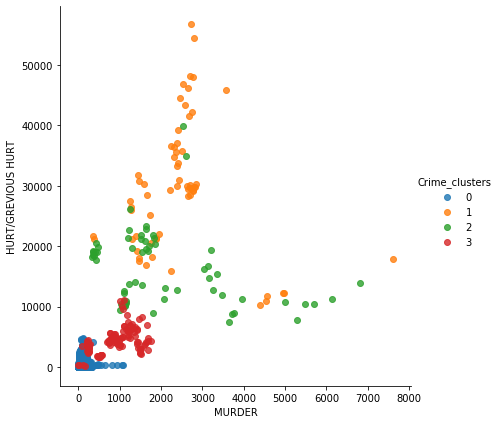

In [24]:
sns.lmplot( 'MURDER','HURT/GREVIOUS HURT',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

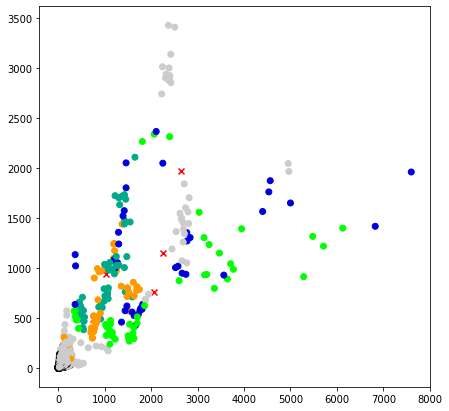

In [25]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


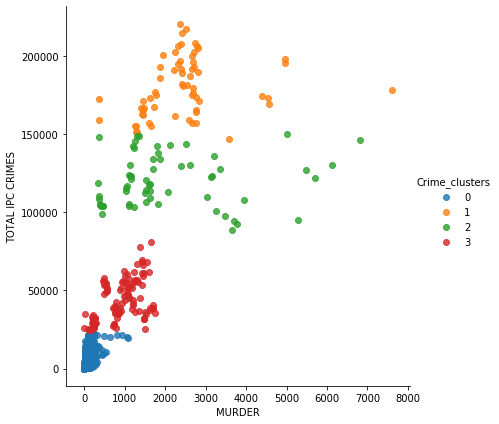

In [26]:
sns.lmplot( 'MURDER','TOTAL IPC CRIMES',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

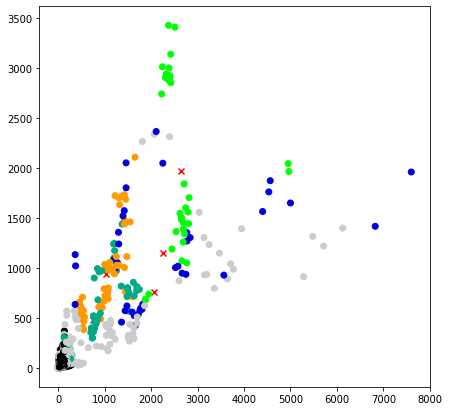

In [27]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


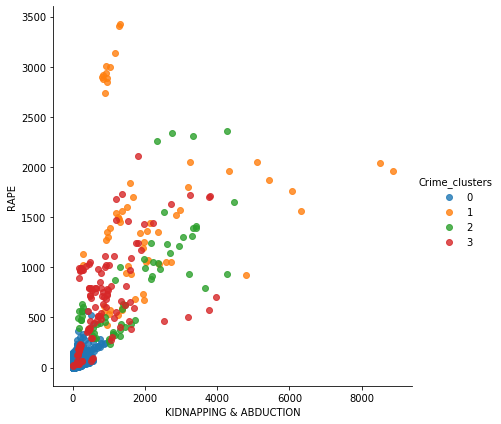

In [28]:
sns.lmplot( 'KIDNAPPING & ABDUCTION','RAPE',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

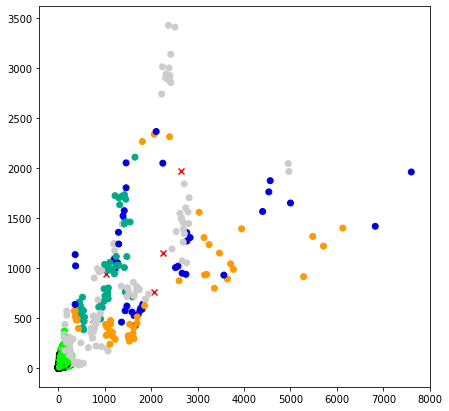

In [29]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


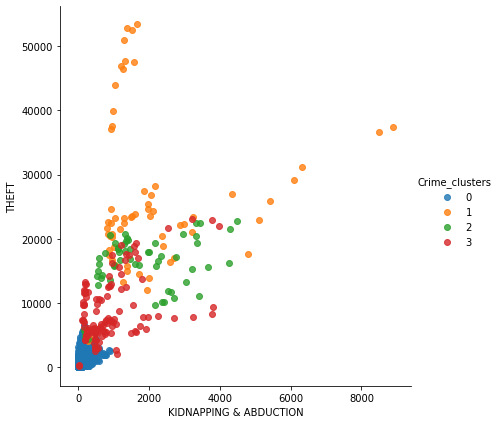

In [30]:
sns.lmplot( 'KIDNAPPING & ABDUCTION','THEFT',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

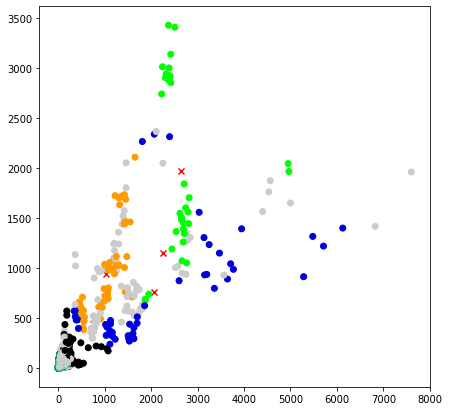

In [31]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


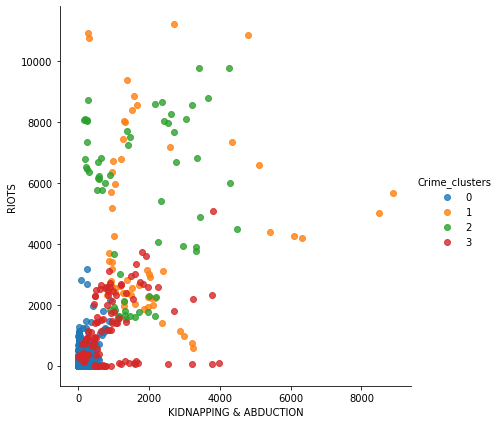

In [32]:
sns.lmplot( 'KIDNAPPING & ABDUCTION','RIOTS',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

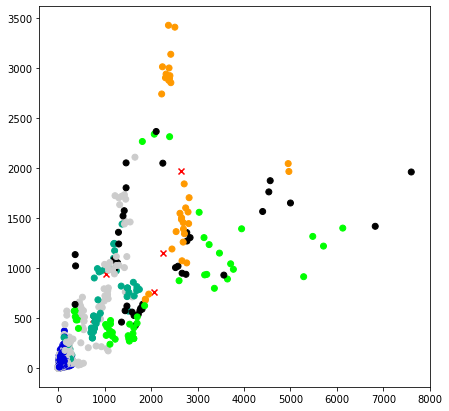

In [33]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


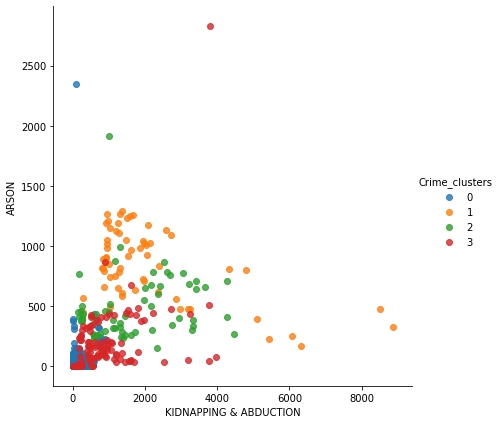

In [34]:
sns.lmplot( 'KIDNAPPING & ABDUCTION','ARSON',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

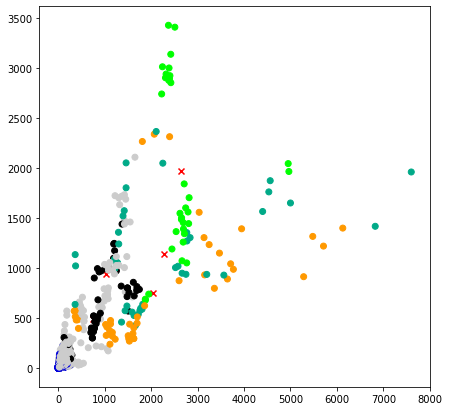

In [35]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


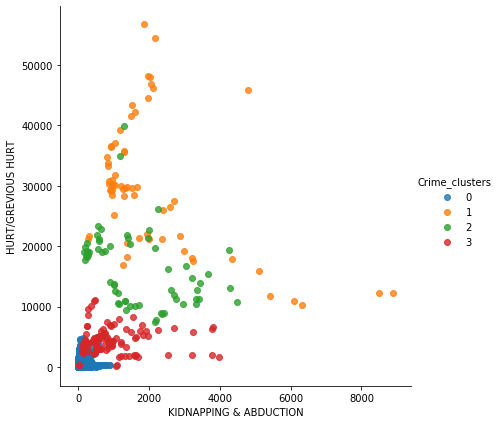

In [36]:
sns.lmplot( 'KIDNAPPING & ABDUCTION','HURT/GREVIOUS HURT',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

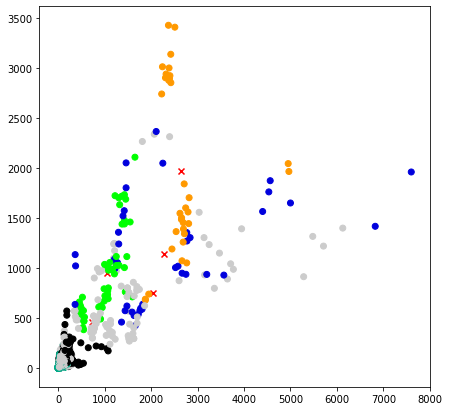

In [37]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


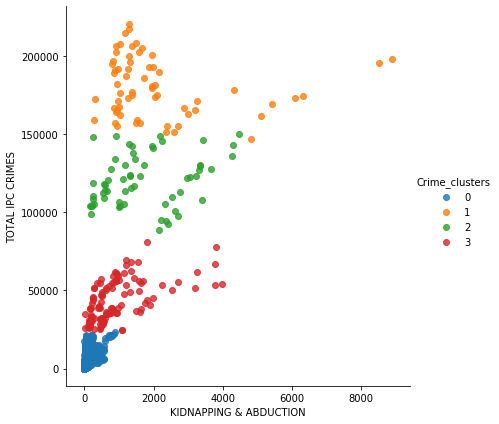

In [38]:
sns.lmplot( 'KIDNAPPING & ABDUCTION','TOTAL IPC CRIMES',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

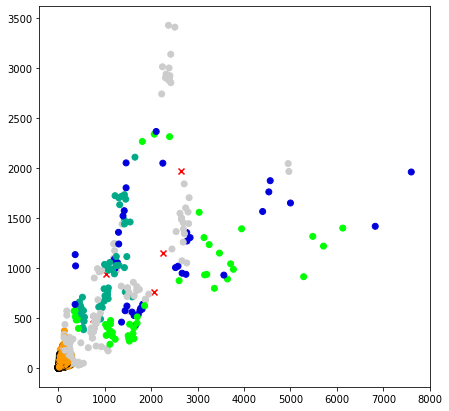

In [39]:
data=X
clusters = KMeans(8);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='red')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.nipy_spectral(float(i) /5) for i in clusters.labels_]);

In [40]:
variables_correlation = df[['MURDER','KIDNAPPING & ABDUCTION','RAPE','THEFT','RIOTS','ARSON','HURT/GREVIOUS HURT','TOTAL IPC CRIMES']]
variables_correlation.corr()

,MURDER,KIDNAPPING & ABDUCTION,RAPE,THEFT,RIOTS,ARSON,HURT/GREVIOUS HURT,TOTAL IPC CRIMES
MURDER,1.000000,0.835742,0.813854,0.813205,0.754043,0.726786,0.736568,0.846449
KIDNAPPING & ABDUCTION,0.835742,1.000000,0.743485,0.745536,0.653766,0.604642,0.581316,0.751826
RAPE,0.813854,0.743485,1.000000,0.788219,0.674311,0.744231,0.764797,0.858241
THEFT,0.813205,0.745536,0.788219,1.000000,0.711998,0.760173,0.813174,0.910790
RIOTS,0.754043,0.653766,0.674311,0.711998,1.000000,0.743134,0.718125,0.800871
ARSON,0.726786,0.604642,0.744231,0.760173,0.743134,1.000000,0.828712,0.831871
HURT/GREVIOUS HURT,0.736568,0.581316,0.764797,0.813174,0.718125,0.828712,1.000000,0.922862
TOTAL IPC CRIMES,0.846449,0.751826,0.858241,0.910790,0.800871,0.831871,0.922862,1.000000


In [41]:
stats = df.sort_values("TOTAL IPC CRIMES", ascending=True)
df_total = pd.DataFrame(stats)

In [42]:
df_total.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Crime_clusters
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116,0.060663
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119,0.388073
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000,0.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000,0.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000,0.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000,3.000000


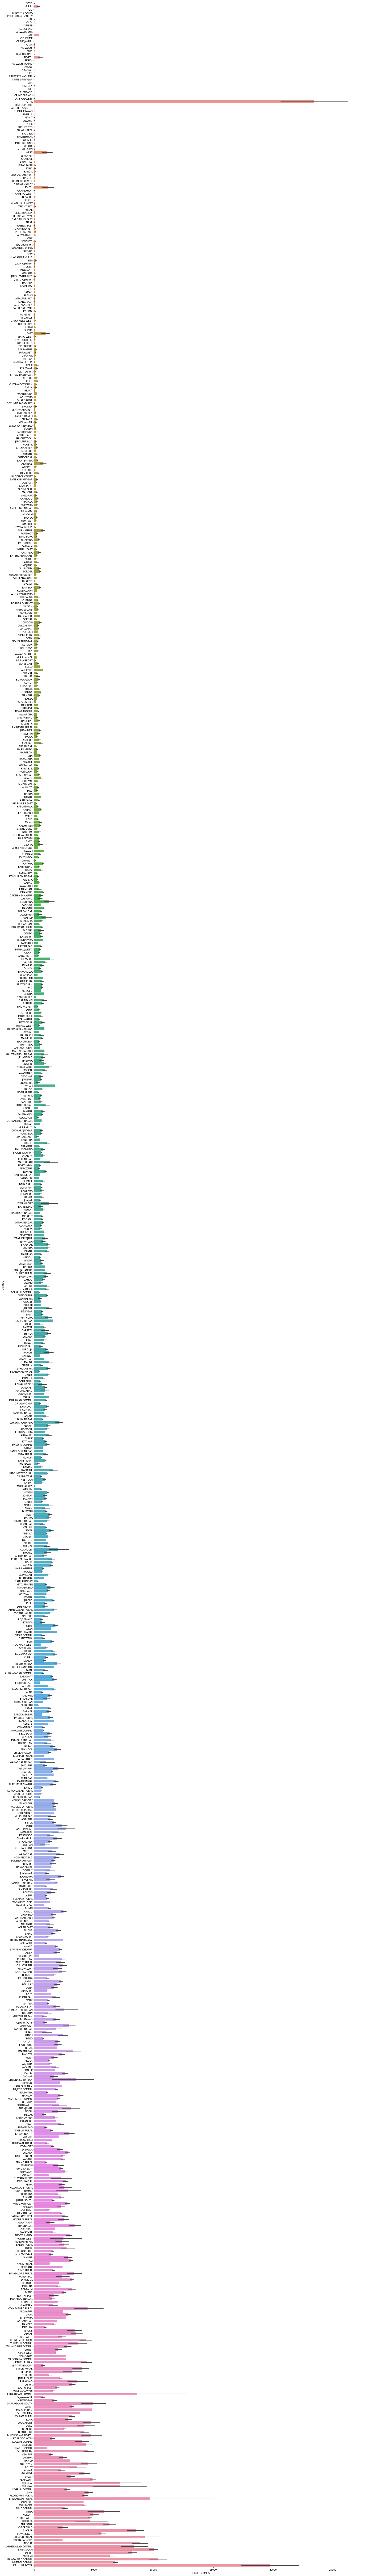

In [43]:
f, ax = plt.subplots(figsize=(25, 200))

# Load the dataset
stats = df.sort_values([ "Crime_clusters", "TOTAL IPC CRIMES"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="DISTRICT", x="OTHER IPC CRIMES", data=stats)

sns.despine(left=True, bottom=True)